In [1]:
%matplotlib inline
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import csv
print('ends')

ends


In [2]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=14)
plt.rcParams['pdf.fonttype'] = 42

In [3]:
#import sys
#sys.path
#sys.modules.keys()
#dir(scr.Scrublet)
#help("modules") 万一不行强制重启

In [4]:
#import re
#for i in sys.modules.keys():
#    value = sys.modules[i]
#    if re.search("scrublet",i):
#        print(i,value)

In [41]:
current_path = %pwd
i=2
sampleset = ["Alpha","Lambda","Mock"]
sample=sampleset[i]
path = [current_path, sampleset[i],""]
a="/"
path=a.join(path)
print(path) 
file = [path,sampleset[i],"_filteredMatrix.csv"]
b = ''
file = b.join(file)
print(file)

/data/jinwf/wangxf/jupyter_notebook/Python/Scrublet/Cov19/Mock/
/data/jinwf/wangxf/jupyter_notebook/Python/Scrublet/Cov19/Mock/Mock_filteredMatrix.csv


In [42]:
counts_matrix=pd.read_csv(file)
print("123")
print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))

123
Counts matrix shape: 10404 rows, 31054 columns


In [43]:
print(type(counts_matrix))

<class 'pandas.core.frame.DataFrame'>


In [44]:
print(type(counts_matrix.iloc[0,0]))

<class 'str'>


In [45]:
counts_matrix.iloc[0:3,0:3]

,Unnamed: 0,Xkr4,Gm1992
0,Mock_AAACCCAAGATTTGCC-1,0,0
1,Mock_AAACCCAAGGCGTTGA-1,0,0
2,Mock_AAACCCAAGTACTGTC-1,0,0


In [46]:
cellNames=counts_matrix.iloc[:,0]

In [47]:
print(type(cellNames))
print(cellNames.iloc[0:5,])
print(cellNames.shape)

<class 'pandas.core.series.Series'>
0    Mock_AAACCCAAGATTTGCC-1
1    Mock_AAACCCAAGGCGTTGA-1
2    Mock_AAACCCAAGTACTGTC-1
3    Mock_AAACCCAAGTGGAATT-1
4    Mock_AAACCCACAACAGCTT-1
Name: Unnamed: 0, dtype: object
(10404,)


In [48]:
del counts_matrix["Unnamed: 0"]

In [49]:
print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))

Counts matrix shape: 10404 rows, 31053 columns


In [50]:
cellNames[0:10]

0    Mock_AAACCCAAGATTTGCC-1
1    Mock_AAACCCAAGGCGTTGA-1
2    Mock_AAACCCAAGTACTGTC-1
3    Mock_AAACCCAAGTGGAATT-1
4    Mock_AAACCCACAACAGCTT-1
5    Mock_AAACCCACAAGAGAGA-1
6    Mock_AAACCCACAAGAGCTG-1
7    Mock_AAACCCACAATTGAAG-1
8    Mock_AAACCCACACCTCGTT-1
9    Mock_AAACCCACATCTGCGG-1
Name: Unnamed: 0, dtype: object

In [51]:
counts_matrix.iloc[0:5,0:5]

,Xkr4,Gm1992,Gm37381,Rp1,Sox17
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [52]:
print(type(counts_matrix.iloc[0,0]))

<class 'numpy.int64'>


In [53]:
scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=0.08)
print("Done.")

Done.


In [54]:
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=50)
print("Done.")

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.74
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.5%
Overall doublet rate:
	Expected   = 8.0%
	Estimated  = 4.0%
Elapsed time: 13.5 seconds
Done.


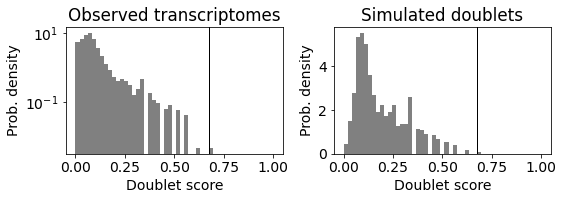

In [40]:
scrub.plot_histogram();##默认的threshold

##Alpha：total 11136 cells: 203 double cells,  expected_doublet_rate=0.08, Estimated  = 10.7% ，threshold=0.33 #默认阈值
##Lambda：total 10776 cells: 0 double cells,  expected_doublet_rate=0.08, Estimated  = 5.8% ，threshold=0.68 #默认阈值
##Mock：total 10404 cells: 0 double cells,  expected_doublet_rate=0.08, Estimated  = 4.0% ，threshold=0.74 #默认阈值

若默认的阈值不合适，则采用以下三行命令自行设置阈值并得到doublet cells

In [51]:
predicted_doublets0 = scrub.call_doublets(threshold=0.35) 

Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 3.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 10.7%


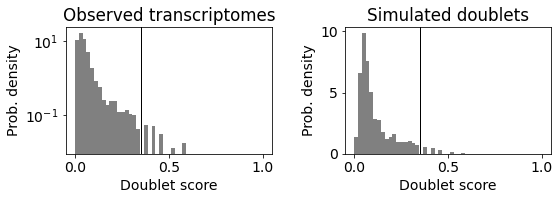

In [53]:
scrub.plot_histogram();##自己设置的threshold 

In [36]:
print(len(predicted_doublets0))
douTrue = [i for i in range(len(predicted_doublets0)) if predicted_doublets0[i] == True]##调整threshold后预测的doublet
print(douTrue[:10])
print("doublet cell: ",len(douTrue))

11733
[128, 178, 711, 1879, 2153, 2264, 2336, 3104, 4243, 4461]
doublet cell:  39


In [20]:
# print('Running UMAP...')
# scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # # Uncomment to run tSNE - slow
# # print('Running tSNE...')
# # scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # # Uncomment to run force layout - slow
# # print('Running ForceAtlas2...')
# # scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
# print('Done.')

In [58]:
# scrub.plot_embedding('UMAP', order_points=True);

# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);

In [21]:
print(len(predicted_doublets))
douTrue = [i for i in range(len(predicted_doublets)) if predicted_doublets[i] == True]##默认的threshold预测的doublet
print(douTrue[:10])
print("doublet cell: ",len(douTrue))

11136
[122, 165, 169, 231, 279, 304, 312, 367, 436, 458]
doublet cell:  203


In [22]:
douCell = cellNames[douTrue]

In [23]:
douCell[:10]

122    Alpha_AAAGTGACATAAGCGG-1
165    Alpha_AACAAGAAGCTACTGT-1
169    Alpha_AACAAGACATCGGAGA-1
231    Alpha_AACCATGTCCCTCATG-1
279    Alpha_AACGAAACAATGGCAG-1
304    Alpha_AACGTCAGTTAAGGGC-1
312    Alpha_AACTTCTTCCCGGTAG-1
367    Alpha_AAGCATCGTTGACTAC-1
436    Alpha_AAGGTAATCCACACCT-1
458    Alpha_AAGTCGTCAGAGTGAC-1
Name: Unnamed: 0, dtype: object

In [24]:
double_cell_name = [sample,"double_cell_name"]
c = "_"
double_cell_name = c.join(double_cell_name)
double_cell_name = [path,double_cell_name]
double_cell_name = b.join(double_cell_name)
print(double_cell_name)
with open(double_cell_name,"w") as f:
    for v in douCell:
        f.write("%s\n"%v)

/data/jinwf/wangxf/jupyter_notebook/Python/Scrublet/Cov19/Alpha/Alpha_double_cell_name


In [25]:
double_cell_scores = [sample,"double_cell_scores"]
c = "_"
double_cell_scores = c.join(double_cell_scores)
double_cell_scores = [path,double_cell_scores]
double_cell_scores = b.join(double_cell_scores)
print(double_cell_scores)
with open(double_cell_scores,"w") as f:
    for v in doublet_scores:
        f.write("%s\n"%v)

/data/jinwf/wangxf/jupyter_notebook/Python/Scrublet/Cov19/Alpha/Alpha_double_cell_scores
